In [ ]:
#1. Import jeopardy.csv and create a dataframe from the data. Find out the following:

#a. How many rows are there in the dataframe? What does a row represent in this
    #dataset? What is the “grain”?
    
#b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?

#c. How many unique shows were there each year?

#d. How many times was each category used?

#e. Which month (over the years) has had the most shows?

#f. Are there any answers that appeared multiple times? Find the questions for the top
#   three most common answers.


#2. Create a visualization that shows the top 5 categories (those referenced the most often).
#Be sure to label appropriately.

In [3]:
#1a: import jeopardy.csv and create dataframe, how many rows, what does row represent, "grain"

import numpy as np
import pandas as pd

#reading the csv file and creading a df then viewing the first 5 entries in the dataframe
jeopardy_df=pd.read_csv("JEOPARDY_CSV.csv")
jeopardy_df.head()

#using index to determine the number of rows
index=jeopardy_df.index
number_rows=len(index)
print(number_rows)

#The rows represent all of the data about individual questions. 
#Each row contains information on which show number, its airdate, the round, category, value, actual question and answer for each unique question.

#I'm honestly not sure what is meant here by "grain".
#Based on Google, it seems like it may refer to amount of detail in a data frame. 
#If that is the correct interpretation, this df contains information about the questions asked
#But, it doesn't contain information about what actually happened/was observed for each question during the show.

#Displaying the head of the dataframe again so I can keep it up and look at it
jeopardy_df.head()

216930


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [70]:
#b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?

#In our group, we discussed the data and determined that it is already pretty clean. 
#In a dirtier dataset, we could get rid of duplicate information & unneeded columns, maybe setting the indexes,
#renaming columns to make more sense, etc. I also read about a lot of processes we have not yet discussed in class.

#For this data, the air date is not in the most useful format. We would like to be able to consider month and year 
#more easily. We can also run a command to remove duplicates (although it doesn't appear there are any?)

#Cleaning data: checking for duplicates and removing rows
jeopardy_no_dup=jeopardy_df.drop_duplicates()
print(len(jeopardy_no_dup))

#Category is in all caps, but could adjust that and only capitalize first letter

#Can the index be cleaner-->instead of position, make index show number. 
#BUT, we don't actually want to do this because then the index would no longer be unique


jeopardy_no_dup['month']=pd.DatetimeIndex(jeopardy_no_dup[' Air Date']).month
jeopardy_no_dup['year']=pd.DatetimeIndex(jeopardy_no_dup[' Air Date']).year
jeopardy_no_dup.head()

216930


,Show Number,Air Date,Round,Category,Value,Question,Answer,month,year
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,12,2004
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,12,2004
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,12,2004
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,12,2004
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,12,2004


In [95]:
#pd.value_counts(jeopardy_df["Show Number"])

#c. How many unique shows were there each year?
#Trying to identify the number of unique shows. I'm not sure if value_counts work here.
unique_shows=jeopardy_df.value_counts("Show Number")
print(len(unique_shows))


#d. How many times was each category used?
#We may wish to know the number of unique categories represented in this dataframe
unique_categories=jeopardy_df.value_counts(" Category")
print(unique_categories)
print(len(unique_categories))

3640
 Category
BEFORE & AFTER           547
SCIENCE                  519
LITERATURE               496
AMERICAN HISTORY         418
POTPOURRI                401
                        ... 
THE THIRD CENTURY          1
IN VENICE                  1
BOOK TITLE REFERENCES      1
POETIC SUBJECTS            1
GEOGRAPHIC MEANINGS        1
Length: 27983, dtype: int64
27983


In [98]:
#e. Which month (over the years) has had the most shows?

#For this question, we only care about the individual shows to see how many shows per month, so we can create a new 

jeopardy_shows=jeopardy_no_dup.sort_values("Show Number")
  
# dropping ALL duplicte values of show number
jeopardy_shows.drop_duplicates(subset ="Show Number",keep = "first", inplace = True)
jeopardy_shows

grouped_by_month=jeopardy_shows.groupby("month")["month"].count()
print(grouped_by_month)

#Checking to make sure I have the correct number of shows represented by everything above
grouped_by_month.sum()

month
1     355
2     293
3     329
4     330
5     351
6     321
7     256
9     272
10    347
11    434
12    352
Name: month, dtype: int64


3640

In [79]:
#f. Are there any answers that appeared multiple times? Find the questions for the top
#   three most common answers.

jeopardy_answers=jeopardy_df[' Answer'].value_counts()
jeopardy_answers.head(3)

#manually making a list of the 3 most common answers 
most_common_answers=["China", "Australia", "Japan"]

most_common_answers_df=jeopardy_df.loc[jeopardy_df[' Answer'].isin(most_common_answers)]

jeopardy_questions=most_common_answers_df[' Question'].value_counts
print(jeopardy_questions)

#jeopardy_common=jeopardy_df[" Answer"].isin(["most_common_answers"])
#jeopardy_common.head(3)

<bound method IndexOpsMixin.value_counts of 404       In February 1904 this country attacked the Rus...
560       A 1994 festival honoring this country featured...
598       In 1958 this country launched its second 5-yea...
688       Large aboriginal populations live in this coun...
874       Sanma aisu is fish-flavored ice cream & taco a...
                                ...                        
215568                                                Kirin
215912    Because of a policy adopted in 1979, this coun...
216044    Norfolk Island & the Republic of Kiribati use ...
216150    Colorful patches called p'u-fang used to indic...
216660            In Asia: Prime Minister Junichiro Koizumi
Name:  Question, Length: 627, dtype: object>


In [56]:
#2. Create a visualization that shows the top 5 categories (those referenced the most often).
#Be sure to label appropriately.

#df_categories= jeopardy_df.value_counts[' Category'].rename_axis('Category').reset_index(name='number of occurences')


#Finding the 5 most common categories in our dataset
#jeopardy_categories=jeopardy_df[' Category'].value_counts()
#jeopardy_categories.head(5)

jeopardy_categories=jeopardy_df[' Category'].value_counts().to_frame()
jeopardy_categories_df = jeopardy_categories.reset_index()
jeopardy_categories_df.columns = ['Category', 'number of occurrences']
jeopardy_categories_df.head(5)

#selecting just the top 5 categories so I can plot
top_5_cats=jeopardy_categories.iloc[0:5,:]
top_5_cats_df=top_5_cats.reset_index()

#Not sure why using iloc messed up my column names but it did. So, I'm renaming them here
top_5_cats_df.columns=['Category', 'number of occurrences']

#Checking to make sure I got what I wanted
top_5_cats_df




,Category,number of occurrences
0,BEFORE & AFTER,547
1,SCIENCE,519
2,LITERATURE,496
3,AMERICAN HISTORY,418
4,POTPOURRI,401


Text(0.5, 1.0, 'Number of Occurrences of top 5 Jeopardy categories')

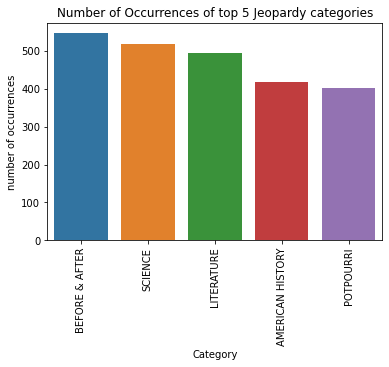

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.barplot(x=top_5_cats_df["Category"], y=top_5_cats_df["number of occurrences"], data=top_5_cats_df)
plt.xticks(rotation=90)
g.set_title("Number of Occurrences of top 5 Jeopardy categories")